# Overall System
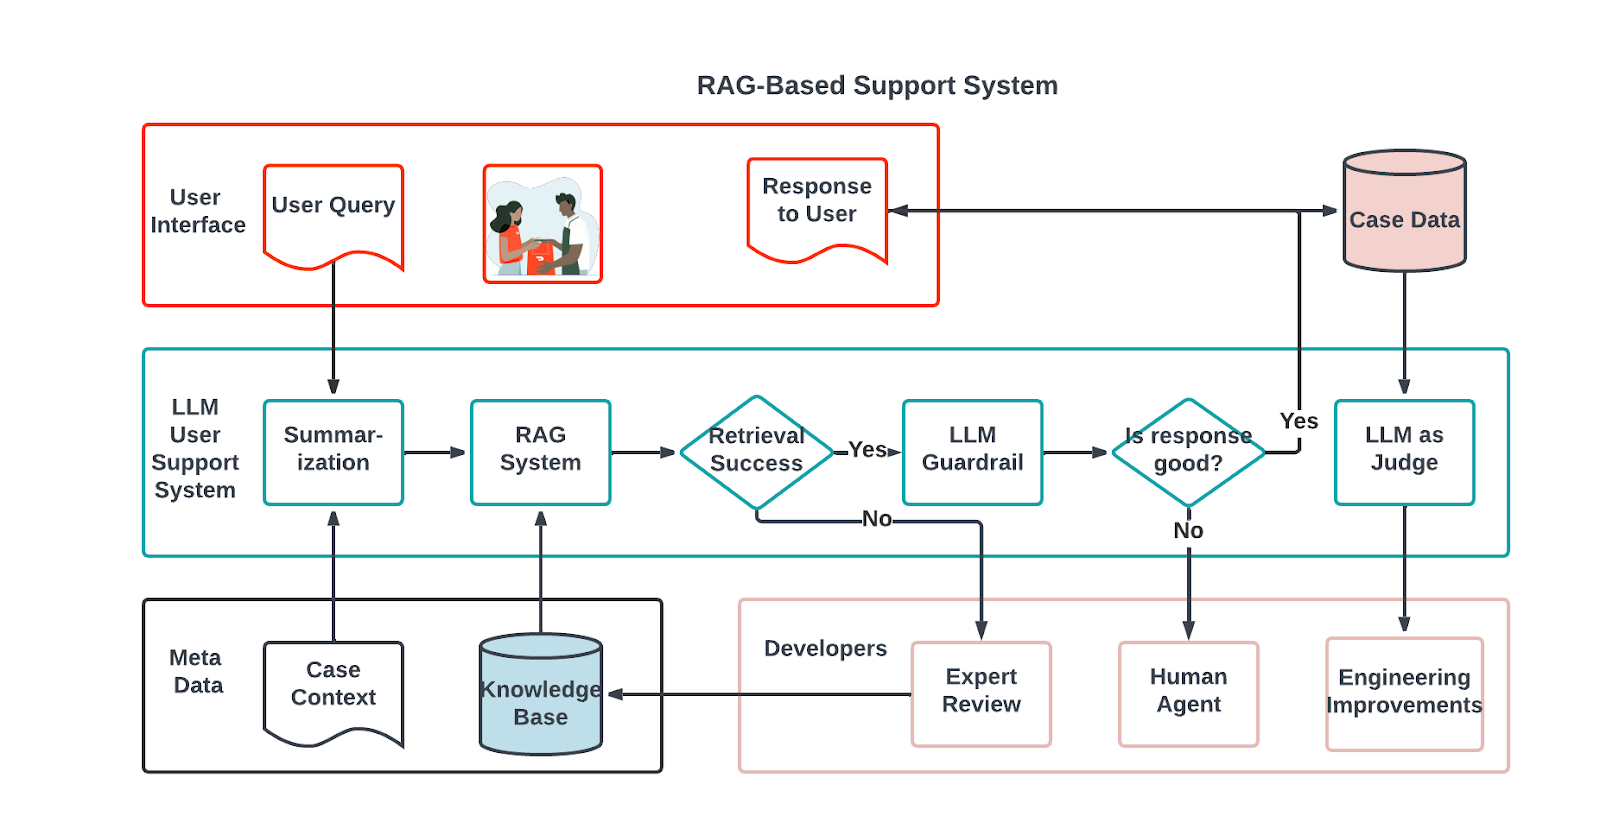

# RAG System

The `RAG System` we are going to implement is to first summarize all the articles and then store the summarizd articles in a vector DB and attach the summary with the full articles

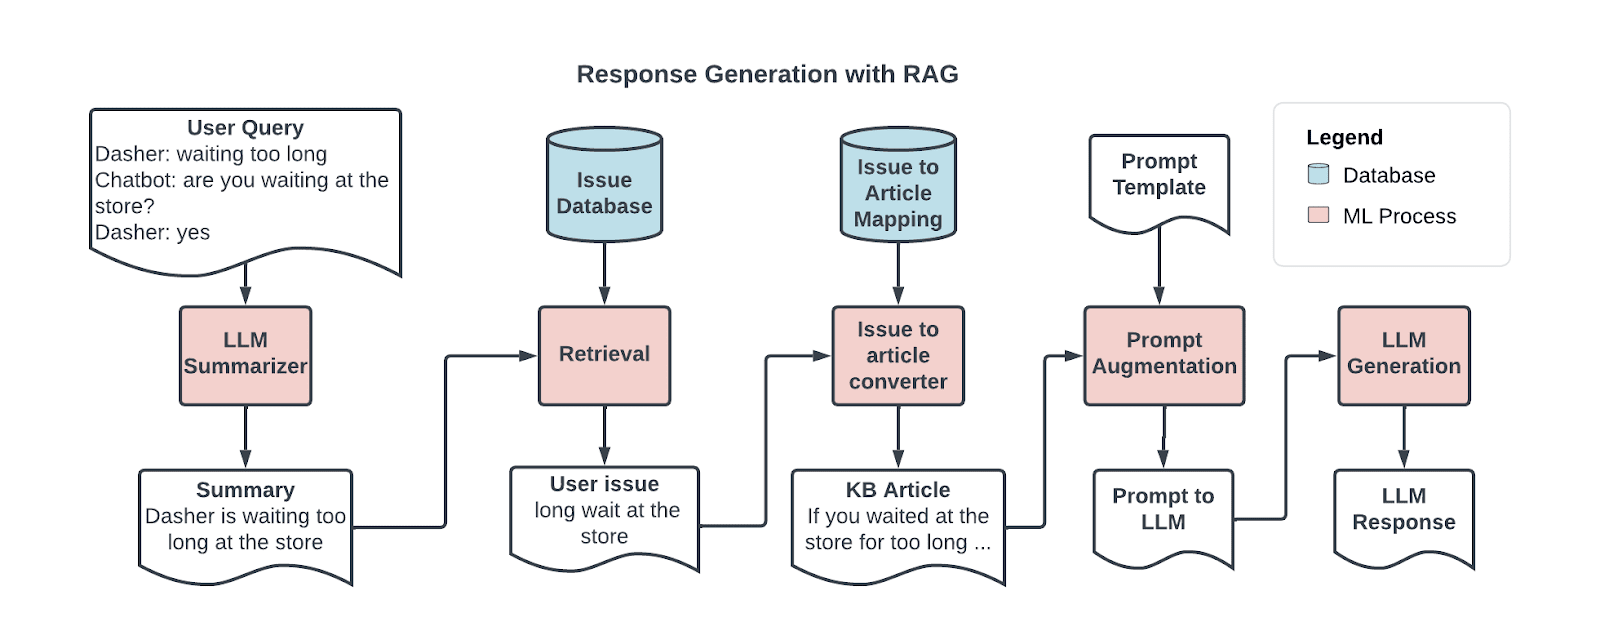

# LLM Gaurdrail

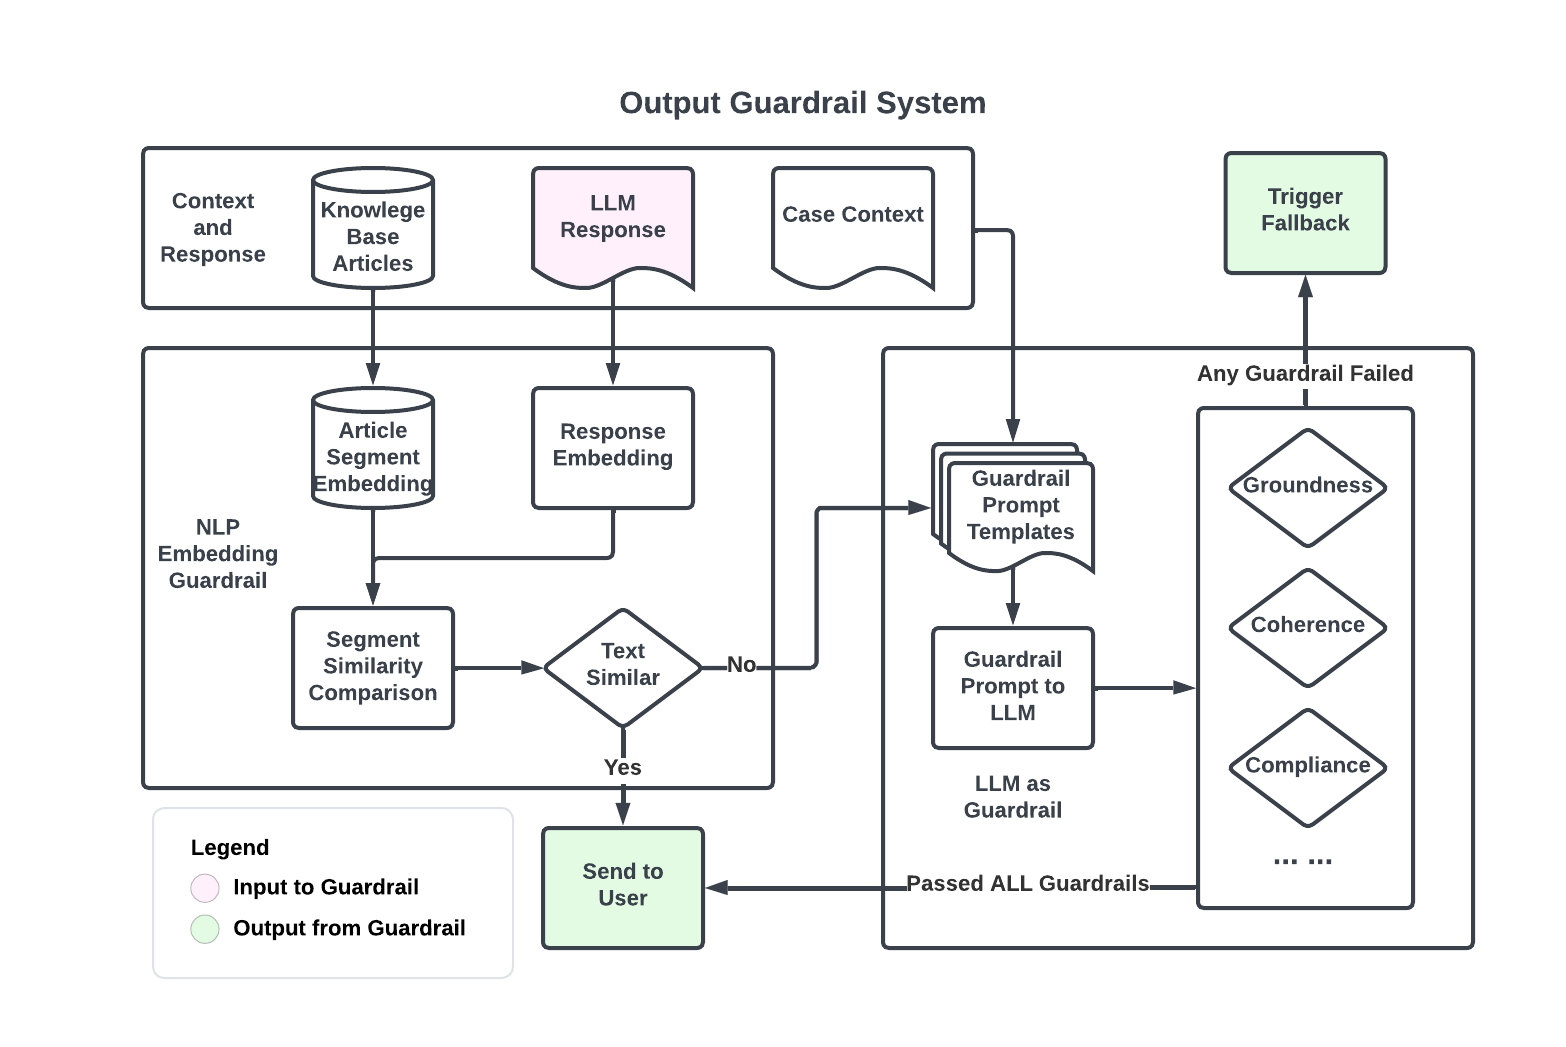

# LLM as a Judge

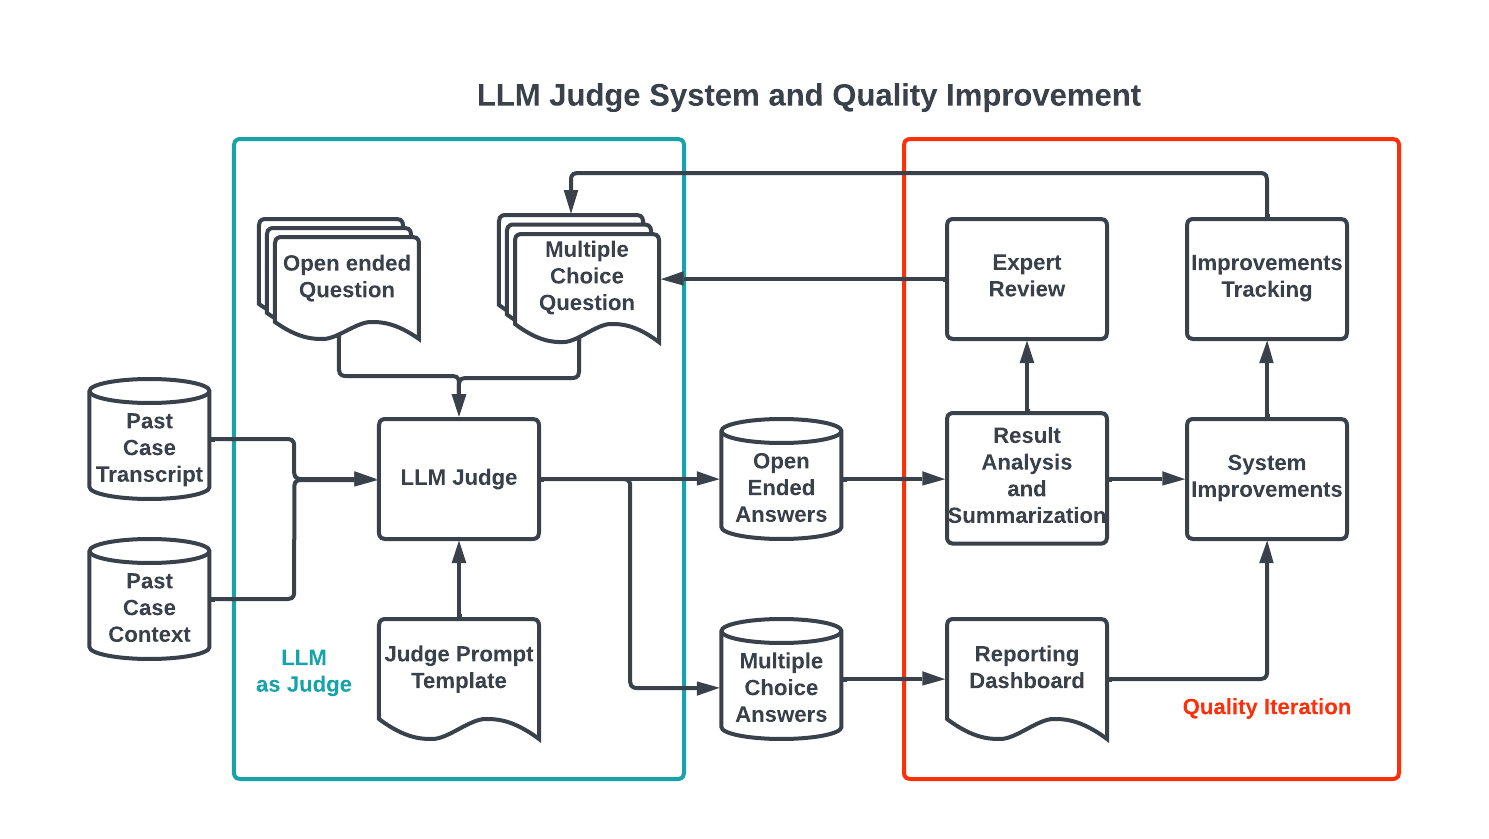

In [1]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 24.0 MB/s eta 0:00:00


In [2]:
!pip install webdriver-manager

In [3]:
!apt-get update

!apt-get install chromium chromium-driver

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,110 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,614 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd


# Web Scraping for all the articles

In [5]:
major_topics=['https://help.doordash.com/dashers/s/topic/0TO1a0000007fAuGAI/become-a-dasher',
              'https://help.doordash.com/dashers/s/topic/0TO1a0000007fAYGAY/accept-and-complete-deliveries',
              'https://help.doordash.com/dashers/s/topic/0TO1a0000007fAfGAI/start-dashing',
              'https://help.doordash.com/dashers/s/topic/0TO1a0000007fAvGAI/earn-and-get-paid',
              'https://help.doordash.com/dashers/s/topic/0TO1a0000007fAWGAY/get-support-and-troubleshooting',
              'https://help.doordash.com/dashers/s/topic/0TO1a0000007fAzGAI/access-special-order-types',
              'https://help.doordash.com/dashers/s/topic/0TO2L000000Ls1LWAS/maintain-great-ratings',
              'https://help.doordash.com/dashers/s/topic/0TO2L000000Ls1QWAS/enjoy-dasher-perks',
              'https://help.doordash.com/dashers/s/topic/0TO2L000000Ls1VWAS/stay-protected-in-covid19',
              'https://help.doordash.com/dashers/s/topic/0TO1a0000007fApGAI/dasher-account-support?language=en_US',
              'https://help.doordash.com/dashers/s/topic/0TO1a0000007fAgGAI/complete-background-checks?language=en_US',
              'https://help.doordash.com/dashers/s/topic/0TO1a0000007fAkGAI/understand-the-dasher-app?language=en_US'
              ]

In [6]:
len(major_topics)

12

In [7]:
def web_driver():

    options = Options()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument('--window-size=1920,1080')
    options.add_argument("--start-maximized")




    driver = webdriver.Chrome(options=options)

    return driver

In [8]:
sub_article_links=[]
sub_article_headings=[]


In [9]:
driver = web_driver()
for major_link in major_topics:
  driver.get(major_link)
  print(major_link)
  try:
    button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//button[@class='slds-button slds-button_brand slds-align_absolute-center loadmore']"))
    )

    button.click()
    time.sleep(3)


  except:
    print('Except')
    pass
  elements=driver.find_elements(by='xpath',value="//article[@class='summary']/a")
  print(len(elements))
  for ele in elements:
    sub_article_headings.append(ele.text)
    sub_article_links.append(ele.get_attribute('href'))



https://help.doordash.com/dashers/s/topic/0TO1a0000007fAuGAI/become-a-dasher
16


KeyboardInterrupt: 

In [ ]:
sub_article_text=[]

In [ ]:
driver=web_driver()

In [ ]:
for i,link in enumerate(sub_article_links):
  driver.get(link)
  print(i)
  print(link)
  time.sleep(10)
  elements=driver.find_elements(by='xpath',value="//div[@class='slds-rich-text-editor__output uiOutputRichText forceOutputRichText selfServiceOutputRichTextWithSmartLinks']")
  # time.sleep(1)
  for ele in elements:
    if ele.text=='':
      print('Empty Text')
    print(ele.text)
    print('--------------------------')
    sub_article_text.append(ele.text)


0
https://help.doordash.com/dashers/s/article/How-do-I-add-or-update-my-bank-account-information
How do I add or update my bank account information?

Dashers can get their earnings weekly via direct deposit. US-based Dashers may also access their earnings more frequently via DasherDirect or Fast Pay.

PLEASE NOTE: For account protection purposes, you will not be able to use Fast Pay for 7 calendar days after any changes to your debit card information. 

Follow the instructions below to make updates or set up your direct deposit:
Go to Settings in your device and give the Dasher app access to your camera.
Launch the Dasher app.
Go to the Earnings tab.
Tap on the View Payout Details button.
Select Change payout method.
Tap Add Bank Account to set up your direct deposit OR Update to change your bank information.
IMPORTANT: Be sure the account provided is a checking account. DoorDash cannot deposit payments into a savings accounts.
If you are adding a bank account, the app will prompt you 

In [ ]:
df = pd.DataFrame({
    'Sub Article Headings': sub_article_headings,
    'Sub Article Links': sub_article_links,
    'Sub Article Text': sub_article_text
})


In [ ]:
csv_filename = 'DoorDashArticle.csv'


df.to_csv(csv_filename, index=False)

In [ ]:
df_new=pd.read_csv(csv_filename)

In [ ]:
list1 = df_new['Sub Article Headings'].tolist()
list2 = df_new['Sub Article Links'].tolist()
list3 = df_new['Sub Article Text'].tolist()
